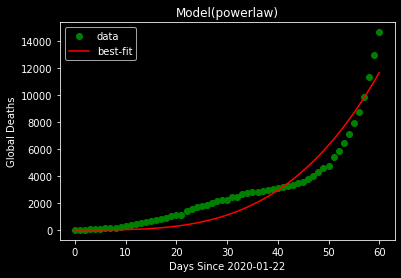

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from lmfit import models
import os
import sys
sys.path.insert(0, os.path.abspath('../lib'))
import c19all

df = c19all.df_all['deaths']
df = df.groupby('day').sum().reset_index()
df = df[['day', 'cases']]

# See https://lmfit.github.io/lmfit-py/builtin_models.html
model = models.PowerLawModel()
params = model.make_params()
result = model.fit(df.cases, params, x=df.day.to_list())
mpl.style.use('dark_background')
result.plot_fit(xlabel='Days Since 2020-01-22', ylabel='Global Deaths', datafmt='og', fitfmt='r')